<a href="https://colab.research.google.com/github/hosngholami/Learning/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
data = sns.load_dataset('tips')

In [4]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
data.shape

(244, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [6]:
data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [7]:
data.sample(5)

,total_bill,tip,sex,smoker,day,time,size
125,29.80,4.2,Female,No,Thur,Lunch,6
154,19.77,2.0,Male,No,Sun,Dinner,4
61,13.81,2.0,Male,Yes,Sat,Dinner,2
214,28.17,6.5,Female,Yes,Sat,Dinner,3
144,16.43,2.3,Female,No,Thur,Lunch,2


In [17]:
data.groupby('day', observed=True).count()

,total_bill,tip,sex,smoker,time,size
day,,,,,,
Thur,62,62,62,62,62,62
Fri,19,19,19,19,19,19
Sat,87,87,87,87,87,87
Sun,76,76,76,76,76,76


In [25]:
data2 = data.groupby('day', observed=True).sum(numeric_only=True)
data2.drop('size', inplace=True, axis=1)
data2['percents'] = data2['tip'] / data2['total_bill'] * 100
data2

,total_bill,tip,percents
day,,,
Thur,1096.33,171.83,15.673201
Fri,325.88,51.96,15.944519
Sat,1778.40,260.40,14.642375
Sun,1627.16,247.39,15.203791


In [27]:
data3 = data.groupby('smoker').sum(numeric_only=True)
data3['percent'] = data3['tip'] / data3['total_bill'] * 100
data3

/tmp/ipython-input-291411158.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data3 = data.groupby('smoker').sum(numeric_only=True)


,total_bill,tip,size,percent
smoker,,,,
Yes,1930.34,279.81,224,14.495374
No,2897.43,451.77,403,15.592094


In [28]:
data4 = data.groupby(['day', 'size']).sum(numeric_only=True)
data4['percent'] = data4['tip'] / data4['total_bill'] * 100
data4.dropna()
data4

/tmp/ipython-input-3012972891.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data4 = data.groupby(['day', 'size']).sum(numeric_only=True)


total_bill     tip    percent
day  size                               
Thur 1          10.07    1.83  18.172790
     2         727.53  117.24  16.114799
     3          76.64   10.77  14.052714
     4         149.75   21.09  14.083472
     5          41.19    5.00  12.138869
     6          91.15   15.90  17.443774
Fri  1           8.58    1.92  22.377622
     2         261.15   42.31  16.201417
     3          15.98    3.00  18.773467
     4          40.17    4.73  11.774956
     5           0.00    0.00        NaN
     6           0.00    0.00        NaN
Sat  1          10.32    2.00  19.379845
     2         892.37  133.43  14.952318
     3         459.17   68.36  14.887732
     4         388.39   53.61  13.803136
     5          28.15    3.00  10.657194
     6           0.00    0.00        NaN
Sun  1           0.00    0.00        NaN
     2         684.84  109.86  16.041703
     3         332.76   46.81  14.067196
     4         480.39   73.58  15.316722
     5          81.00   12.14  14.987654
     6          48.17    5.00  10.379905

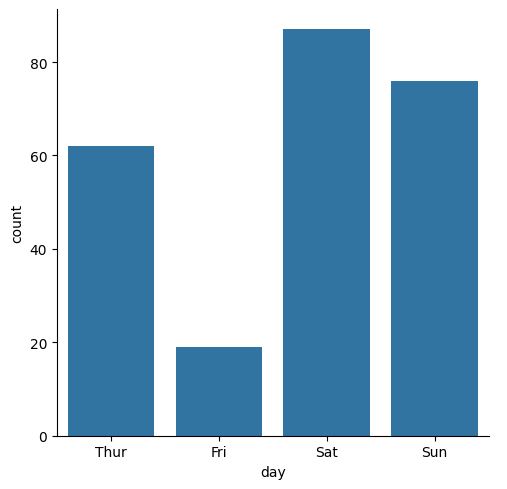

In [29]:
sns.catplot(x='day', kind='count', data=data)

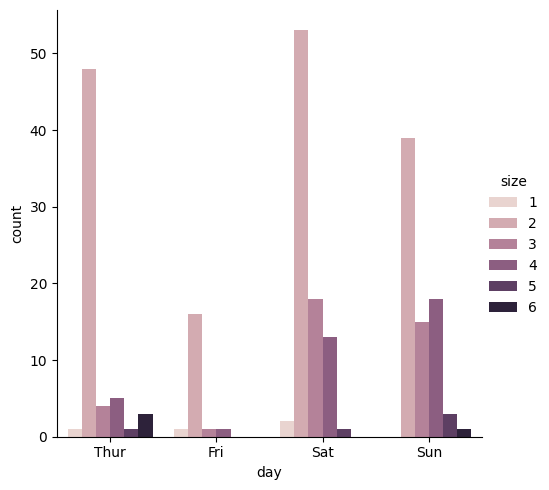

In [30]:
sns.catplot(x='day', hue='size', kind='count', data=data)

In [15]:
data.replace({'sex' : {'Male': 0, 'Female' : 1}, 'smoker' : {'No' : 0, 'Yes' : 1 } }, inplace=True)
data

/tmp/ipython-input-1271155680.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'sex' : {'Male': 0, 'Female' : 1}, 'smoker' : {'No' : 0, 'Yes' : 1 } }, inplace=True)
/tmp/ipython-input-1271155680.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data.replace({'sex' : {'Male': 0, 'Female' : 1}, 'smoker' : {'No' : 0, 'Yes' : 1 } }, inplace=True)


,total_bill,tip,sex,smoker,day,time,size,Thur,Fri,Sat,Sun,Lunch,Dinner
0,16.99,1.01,1,0,Sun,Dinner,2,False,False,False,True,False,True
1,10.34,1.66,0,0,Sun,Dinner,3,False,False,False,True,False,True
2,21.01,3.50,0,0,Sun,Dinner,3,False,False,False,True,False,True
3,23.68,3.31,0,0,Sun,Dinner,2,False,False,False,True,False,True
4,24.59,3.61,1,0,Sun,Dinner,4,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,0,0,Sat,Dinner,3,False,False,True,False,False,True
240,27.18,2.00,1,1,Sat,Dinner,2,False,False,True,False,False,True
241,22.67,2.00,0,1,Sat,Dinner,2,False,False,True,False,False,True
242,17.82,1.75,0,0,Sat,Dinner,2,False,False,True,False,False,True


In [12]:
day = pd.get_dummies(data['day'])
data = pd.concat([data, day], axis=1)

In [13]:
times = pd.get_dummies(data['time'])
data = pd.concat([data, times], axis=1)

In [14]:
data

,total_bill,tip,sex,smoker,day,time,size,Thur,Fri,Sat,Sun,Lunch,Dinner
0,16.99,1.01,Female,0,Sun,Dinner,2,False,False,False,True,False,True
1,10.34,1.66,0,0,Sun,Dinner,3,False,False,False,True,False,True
2,21.01,3.50,0,0,Sun,Dinner,3,False,False,False,True,False,True
3,23.68,3.31,0,0,Sun,Dinner,2,False,False,False,True,False,True
4,24.59,3.61,Female,0,Sun,Dinner,4,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,0,0,Sat,Dinner,3,False,False,True,False,False,True
240,27.18,2.00,Female,1,Sat,Dinner,2,False,False,True,False,False,True
241,22.67,2.00,0,1,Sat,Dinner,2,False,False,True,False,False,True
242,17.82,1.75,0,0,Sat,Dinner,2,False,False,True,False,False,True


In [17]:
X = data[['sex', 'smoker', 'size', 'Thur', 'Fri', 'Sat', 'Sun', 'Lunch', 'Dinner']]
Y = data[['tip']]

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [21]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [22]:
predections = model.predict(X_test)

<Axes: ylabel='Count'>

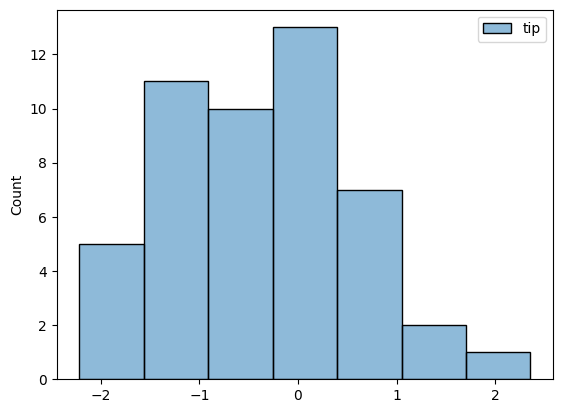

In [23]:
sns.histplot(Y_test - predections)

In [27]:
print('Mean Absolute Error', metrics.mean_absolute_error(Y_test, predections))
print('Mean Squared Error', metrics.mean_squared_error(Y_test, predections))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(Y_test, predections)))

Mean Absolute Error 0.8596147920366178
Mean Squared Error 1.1089152388447139
Root Mean Squared Error 1.053050444586922


In [29]:
X.head()

,sex,smoker,size,Thur,Fri,Sat,Sun,Lunch,Dinner
0,1,0,2,False,False,False,True,False,True
1,0,0,3,False,False,False,True,False,True
2,0,0,3,False,False,False,True,False,True
3,0,0,2,False,False,False,True,False,True
4,1,0,4,False,False,False,True,False,True


In [33]:
customer = np.array([1, 0, 1, 0, 0, 0, 1, 0, 1]).reshape(1, -1)
model.predict(customer)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[1.8673331]])

In [35]:
from six.moves import urllib
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)

In [36]:
!pip install onnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 62.4 MB/s eta 0:00:00


In [40]:
!pip install onnxmltools
!pip install onnxruntime
!pip install skl2onnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.5/315.5 kB 8.0 MB/s eta 0:00:00


In [43]:
import onnxmltools
import onnxruntime
from skl2onnx.common.data_types import FloatTensorType

# Define initial types for the model input
initial_type = [('input', FloatTensorType([None, X.shape[1]]))]

# Convert the LinearRegression model to ONNX format
onnx_model = onnxmltools.convert_sklearn(model, initial_types=initial_type)
onnx_file = "Tips-LinearRegression.onnx"
onnxmltools.utils.save_model(onnx_model, onnx_file)

print(f"Model saved to {onnx_file}")

Model saved to Tips-LinearRegression.onnx


In [47]:
sess = onnxruntime.InferenceSession(onnx_file)

# Evaluate the model on some test data
input_data = {"input": X_test[:10].values.astype('float32')}
output = sess.run(None, input_data)

In [48]:
output

[array([[2.7006896],
        [2.7550335],
        [4.2182646],
        [4.260809 ],
        [2.491535 ],
        [2.8519218],
        [2.64762  ],
        [2.394647 ],
        [2.7550335],
        [2.8725688]], dtype=float32)]